In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

from itertools import combinations
from scipy.stats import pearsonr

# Negative Transfer
- Load results
- Plot heatmaps for pairwise accuracy
- Correlate pairwise accuracy matrices

In [2]:
p_mlp_single = '/Users/harveyaa/Documents/masters/neuropsych_mtl/MTL/results_paper/conditions'
p_mlp_pairs = '/Users/harveyaa/Documents/masters/neuropsych_mtl/MTL/results_paper/neg_transfer/mlp'

p_cnn_single = '/Users/harveyaa/Documents/masters/neuropsych_mtl/MTL/results_paper/neg_transfer/cnn/single'
p_cnn_pairs = '/Users/harveyaa/Documents/masters/neuropsych_mtl/MTL/results_paper/neg_transfer/cnn'

p_concat_single = '/Users/harveyaa/Documents/masters/neuropsych_mtl/MTL/results_paper/neg_transfer/concat/single'
p_concat_pairs = '/Users/harveyaa/Documents/masters/neuropsych_mtl/MTL/results_paper/neg_transfer/concat'

p_deeper_single = '/Users/harveyaa/Documents/masters/neuropsych_mtl/MTL/results_paper/neg_transfer/deeper/single'
p_deeper_pairs = '/Users/harveyaa/Documents/masters/neuropsych_mtl/MTL/results_paper/neg_transfer/deeper'

p_mps_single = p_mlp_single
p_mps_pairs = '/Users/harveyaa/Documents/masters/neuropsych_mtl/MTL/results_paper/neg_transfer/mps'

p_mps_big_single = '/Users/harveyaa/Documents/masters/neuropsych_mtl/MTL/results_paper/neg_transfer/mps_big/single'
p_mps_big_pairs = '/Users/harveyaa/Documents/masters/neuropsych_mtl/MTL/results_paper/neg_transfer/mps_big'

cases = ['DUP1q21_1',
        'DEL1q21_1',
        'DUP22q11_2',
        'DUP16p11_2',
        'DEL16p11_2',
        'DEL22q11_2',
        'ASD',
        'SZ',
        'BIP',]

labels = ['DUP 1q21.1',
        'DEL 1q21.1',
        'DUP 22q11.2',
        'DUP 16p11.2',
        'DEL 16p11.2',
        'DEL 22q11.2',
        'ASD',
        'SZ',
        'BIP',]

case_to_idx = dict(zip(cases,range(len(cases))))

pairs = [combo for combo in combinations(cases,2)]

# MLP
## Load Single Task Results

In [3]:
mlp_single = np.zeros(len(cases))
for case in cases:
    p = os.path.join(p_mlp_single,f'{case}')
    final_acc = []
    for i in range(5):
        p_fold = os.path.join(p,f'fold_{i}')
        file = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0]
        df = pd.read_csv(os.path.join(p,f'fold_{i}',file),index_col=0,header=[0,1])[case]
        final_acc.append(df['Accuracy/test'].iloc[-1])
    mlp_single[case_to_idx[case]] = np.mean(final_acc)

## Load Pair Results

In [4]:
mlp_pairs = np.zeros((len(cases),len(cases)))
for i in range(1,len(pairs)+1):
    p = os.path.join(p_mlp_pairs,f'pair_{i}')
    p_fold = os.path.join(p,'fold_0')
    case1 = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0].split('.')[0].split('-')[2]
    case2 = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0].split('.')[0].split('-')[3]
    final_acc_case1 = []
    final_acc_case2 = []
    for i in range(5):
        p_fold = os.path.join(p,f'fold_{i}')
        file = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0]
        df = pd.read_csv(os.path.join(p_fold,file),index_col=0,header=[0,1])
        final_acc_case1.append(df[case1]['Accuracy/test'].iloc[-1])
        final_acc_case2.append(df[case2]['Accuracy/test'].iloc[-1])
    
    # case1, case2: accuracy of case1 trained with case2
    mlp_pairs[case_to_idx[case1],case_to_idx[case2]] = np.mean(final_acc_case1)
    mlp_pairs[case_to_idx[case2],case_to_idx[case1]] = np.mean(final_acc_case2)

np.fill_diagonal(mlp_pairs,mlp_single)

# CNN
## Load Single Task Results

In [5]:
cnn_single = np.zeros(len(cases))
for case in cases:
    p = os.path.join(p_cnn_single,f'{case}')
    final_acc = []
    for i in range(5):
        p_fold = os.path.join(p,f'fold_{i}')
        file = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0]
        df = pd.read_csv(os.path.join(p,f'fold_{i}',file),index_col=0,header=[0,1])[case]
        final_acc.append(df['Accuracy/test'].iloc[-1])
    cnn_single[case_to_idx[case]] = np.mean(final_acc)


## Load Pair Results

In [6]:
cnn_pairs = np.zeros((len(cases),len(cases)))
for i in range(1,len(pairs)+1):
    p = os.path.join(p_cnn_pairs,f'pair_{i}')
    p_fold = os.path.join(p,'fold_0')
    case1 = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0].split('.')[0].split('-')[2]
    case2 = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0].split('.')[0].split('-')[3]
    final_acc_case1 = []
    final_acc_case2 = []
    for i in range(5):
        p_fold = os.path.join(p,f'fold_{i}')
        files = [f for f in os.listdir(p_fold) if f[-4:]=='.csv']
        file = files[0]
        df = pd.read_csv(os.path.join(p_fold,file),index_col=0,header=[0,1])
        final_acc_case1.append(df[case1]['Accuracy/test'].iloc[-1])
        final_acc_case2.append(df[case2]['Accuracy/test'].iloc[-1])
    
    # case1, case2: accuracy of case1 trained with case2
    cnn_pairs[case_to_idx[case1],case_to_idx[case2]] = np.mean(final_acc_case1)
    cnn_pairs[case_to_idx[case2],case_to_idx[case1]] = np.mean(final_acc_case2)

np.fill_diagonal(cnn_pairs,cnn_single)

# Concat
## Load Single Task Results

In [7]:
concat_single = np.zeros(len(cases))
for case in cases:
    p = os.path.join(p_concat_single,f'{case}')
    final_acc = []
    for i in range(5):
        p_fold = os.path.join(p,f'fold_{i}')
        file = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0]
        df = pd.read_csv(os.path.join(p,f'fold_{i}',file),index_col=0,header=[0,1])[case]
        final_acc.append(df['Accuracy/test'].iloc[-1])
    concat_single[case_to_idx[case]] = np.mean(final_acc)

## Load Pair Results

In [8]:
concat_pairs = np.zeros((len(cases),len(cases)))
for i in range(1,len(pairs)+1):
    p = os.path.join(p_concat_pairs,f'pair_{i}')
    p_fold = os.path.join(p,'fold_0')
    case1 = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0].split('.')[0].split('-')[2]
    case2 = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0].split('.')[0].split('-')[3]
    final_acc_case1 = []
    final_acc_case2 = []
    for i in range(5):
        p_fold = os.path.join(p,f'fold_{i}')
        if os.path.exists(p_fold):
            files = [f for f in os.listdir(p_fold) if f[-4:]=='.csv']
            if len(files) != 0:
                file = files[0]
                df = pd.read_csv(os.path.join(p_fold,file),index_col=0,header=[0,1])
                final_acc_case1.append(df[case1]['Accuracy/test'].iloc[-1])
                final_acc_case2.append(df[case2]['Accuracy/test'].iloc[-1])
            else:
                print(f"{case1} {case2} {i}")
        else:
                print(f"{case1} {case2} {i}")
    
    # case1, case2: accuracy of case1 trained with case2
    concat_pairs[case_to_idx[case1],case_to_idx[case2]] = np.mean(final_acc_case1)
    concat_pairs[case_to_idx[case2],case_to_idx[case1]] = np.mean(final_acc_case2)

np.fill_diagonal(concat_pairs,concat_single)

ASD SZ 3
ASD SZ 4


# Deeper
# Load Single Task Results

In [9]:
deeper_single = np.zeros(len(cases))
for case in cases:
    p = os.path.join(p_deeper_single,f'{case}')
    final_acc = []
    for i in range(5):
        p_fold = os.path.join(p,f'fold_{i}')
        file = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0]
        df = pd.read_csv(os.path.join(p,f'fold_{i}',file),index_col=0,header=[0,1])[case]
        final_acc.append(df['Accuracy/test'].iloc[-1])

    deeper_single[case_to_idx[case]] = np.mean(final_acc)

## Load Pair Results

In [10]:
deeper_pairs = np.zeros((len(cases),len(cases)))
for i in range(1,len(pairs)+1):
    p = os.path.join(p_deeper_pairs,f'pair_{i}')
    p_fold = os.path.join(p,'fold_0')
    case1 = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0].split('.')[0].split('-')[2]
    case2 = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0].split('.')[0].split('-')[3]
    final_acc_case1 = []
    final_acc_case2 = []
    for i in range(5):
        p_fold = os.path.join(p,f'fold_{i}')
        if os.path.exists(p_fold):
            files = [f for f in os.listdir(p_fold) if f[-4:]=='.csv']
            if len(files) != 0:
                file = files[0]
                df = pd.read_csv(os.path.join(p_fold,file),index_col=0,header=[0,1])
                final_acc_case1.append(df[case1]['Accuracy/test'].iloc[-1])
                final_acc_case2.append(df[case2]['Accuracy/test'].iloc[-1])
            else:
                print(f"{case1} {case2} {i}")
        else:
            print(f"{case1} {case2} {i}")
    
    # case1, case2: accuracy of case1 trained with case2
    deeper_pairs[case_to_idx[case1],case_to_idx[case2]] = np.mean(final_acc_case1)
    deeper_pairs[case_to_idx[case2],case_to_idx[case1]] = np.mean(final_acc_case2)

np.fill_diagonal(deeper_pairs,deeper_single)

DEL16p11_2 DUP16p11_2 3
DEL16p11_2 DUP16p11_2 4
DEL16p11_2 DEL1q21_1 4
DEL16p11_2 DUP1q21_1 4
DUP16p11_2 DEL1q21_1 3
DUP16p11_2 DEL1q21_1 4
DUP1q21_1 DUP16p11_2 4
DEL1q21_1 DUP1q21_1 4


# MPS
# Load Single Task Results

In [11]:
mps_single = np.zeros(len(cases))
for case in cases:
    p = os.path.join(p_mps_single,f'{case}')
    final_acc = []
    for i in range(5):
        p_fold = os.path.join(p,f'fold_{i}')
        file = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0]
        df = pd.read_csv(os.path.join(p,f'fold_{i}',file),index_col=0,header=[0,1])[case]
        final_acc.append(df['Accuracy/test'].iloc[-1])

    mps_single[case_to_idx[case]] = np.mean(final_acc)

## Load Pair Results

In [12]:
mps_pairs = np.zeros((len(cases),len(cases)))
for i in range(1,len(pairs)+1):
    p = os.path.join(p_mps_pairs,f'pair_{i}')
    p_fold = os.path.join(p,'fold_0')
    case1 = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0].split('.')[0].split('-')[2]
    case2 = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0].split('.')[0].split('-')[3]
    final_acc_case1 = []
    final_acc_case2 = []
    for i in range(5):
        p_fold = os.path.join(p,f'fold_{i}')
        if os.path.exists(p_fold):
            files = [f for f in os.listdir(p_fold) if f[-4:]=='.csv']
            if len(files) != 0:
                file = files[0]
                df = pd.read_csv(os.path.join(p_fold,file),index_col=0,header=[0,1])
                final_acc_case1.append(df[case1]['Accuracy/test'].iloc[-1])
                final_acc_case2.append(df[case2]['Accuracy/test'].iloc[-1])
            else:
                print(f"{case1} {case2} {i}")
        else:
            print(f"{case1} {case2} {i}")
    
    # case1, case2: accuracy of case1 trained with case2
    mps_pairs[case_to_idx[case1],case_to_idx[case2]] = np.mean(final_acc_case1)
    mps_pairs[case_to_idx[case2],case_to_idx[case1]] = np.mean(final_acc_case2)

np.fill_diagonal(mps_pairs,mps_single)

ASD SZ 4


# MPS_BIG
# Load Single Task Results

In [13]:
mps_big_single = np.zeros(len(cases))
for case in cases:
    p = os.path.join(p_mps_big_single,f'{case}')
    final_acc = []
    for i in range(5):
        p_fold = os.path.join(p,f'fold_{i}')
        file = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0]
        df = pd.read_csv(os.path.join(p,f'fold_{i}',file),index_col=0,header=[0,1])[case]
        final_acc.append(df['Accuracy/test'].iloc[-1])

    mps_big_single[case_to_idx[case]] = np.mean(final_acc)

## Load Pair Results

In [14]:
mps_big_pairs = np.zeros((len(cases),len(cases)))
for i in range(1,len(pairs)+1):
    p = os.path.join(p_mps_big_pairs,f'pair_{i}')
    p_fold = os.path.join(p,'fold_0')
    case1 = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0].split('.')[0].split('-')[2]
    case2 = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0].split('.')[0].split('-')[3]
    final_acc_case1 = []
    final_acc_case2 = []
    for i in range(5):
        p_fold = os.path.join(p,f'fold_{i}')
        if os.path.exists(p_fold):
            files = [f for f in os.listdir(p_fold) if f[-4:]=='.csv']
            if len(files) != 0:
                file = files[0]
                df = pd.read_csv(os.path.join(p_fold,file),index_col=0,header=[0,1])
                final_acc_case1.append(df[case1]['Accuracy/test'].iloc[-1])
                final_acc_case2.append(df[case2]['Accuracy/test'].iloc[-1])
            else:
                print(f"{case1} {case2} {i}")
        else:
            print(f"{case1} {case2} {i}")
    
    # case1, case2: accuracy of case1 trained with case2
    mps_big_pairs[case_to_idx[case1],case_to_idx[case2]] = np.mean(final_acc_case1)
    mps_big_pairs[case_to_idx[case2],case_to_idx[case1]] = np.mean(final_acc_case2)

np.fill_diagonal(mps_big_pairs,mps_big_single)

ASD SZ 4


# Compare

In [15]:
mlp_diff = (mlp_pairs.transpose() - mlp_single).transpose()
concat_diff = (concat_pairs.transpose() - concat_single).transpose()
deeper_diff = (deeper_pairs.transpose() - deeper_single).transpose()
cnn_diff = (cnn_pairs.transpose() - cnn_single).transpose()
mps_diff = (mps_pairs.transpose() - mps_single).transpose()
mps_big_diff = (mps_big_pairs.transpose() - mps_big_single).transpose()

#np.save('./results_paper/neg_transfer/figures/mlp_diff.npy',mlp_diff)
#np.save('./results_paper/neg_transfer/figures/cnn_diff.npy',cnn_diff)
#np.save('./results_paper/neg_transfer/figures/concat_diff.npy',concat_diff)
#np.save('./results_paper/neg_transfer/figures/deeper_diff.npy',deeper_diff)
#np.save('./results_paper/neg_transfer/figures/mps_diff.npy',mps_diff)
#np.save('./results_paper/neg_transfer/figures/mps_big_diff.npy',mps_big_diff)

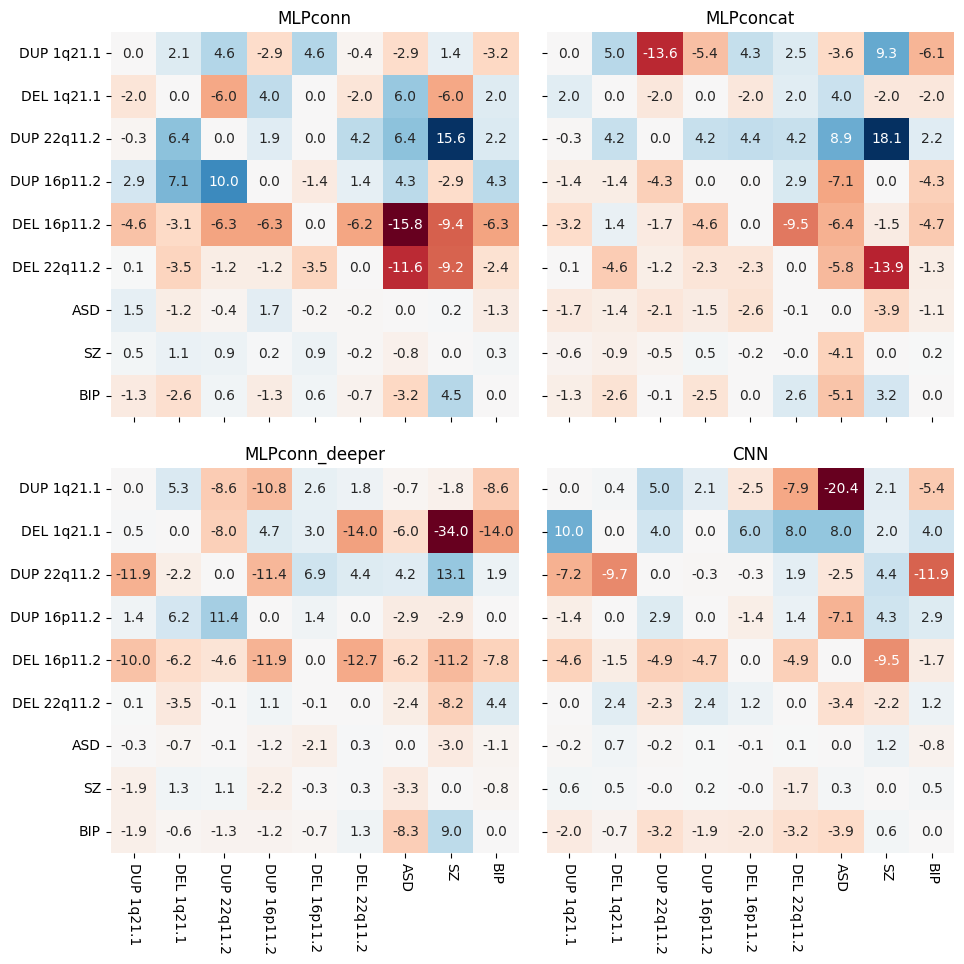

In [16]:
fig,ax = plt.subplots(2,2,figsize=(10,10),sharey=True,sharex=True)
sns.heatmap(mlp_diff,xticklabels=labels,yticklabels=labels,annot=True,cmap='RdBu',cbar=False,ax=ax[0,0],center=0,fmt='.1f')
sns.heatmap(concat_diff,xticklabels=labels,yticklabels=labels,annot=True,cmap='RdBu',cbar=False,ax=ax[0,1],center=0,fmt='.1f')
sns.heatmap(deeper_diff,xticklabels=labels,yticklabels=labels,annot=True,cmap='RdBu',cbar=False,ax=ax[1,0],center=0,fmt='.1f')
sns.heatmap(cnn_diff,xticklabels=labels,yticklabels=labels,annot=True,cmap='RdBu',cbar=False,ax=ax[1,1],center=0,fmt='.1f')
ax[0,0].set_title('MLPconn')
ax[0,1].set_title('MLPconcat')
ax[1,0].set_title('MLPconn_deeper')
ax[1,1].set_title('CNN')

ax[1,0].set_xticklabels(labels,rotation=270)
ax[1,1].set_xticklabels(labels,rotation=270)
plt.tight_layout(pad=2)
plt.savefig('./results_paper/neg_transfer/figures/quad_comparison.png',dpi=300)

# Combined fig V2

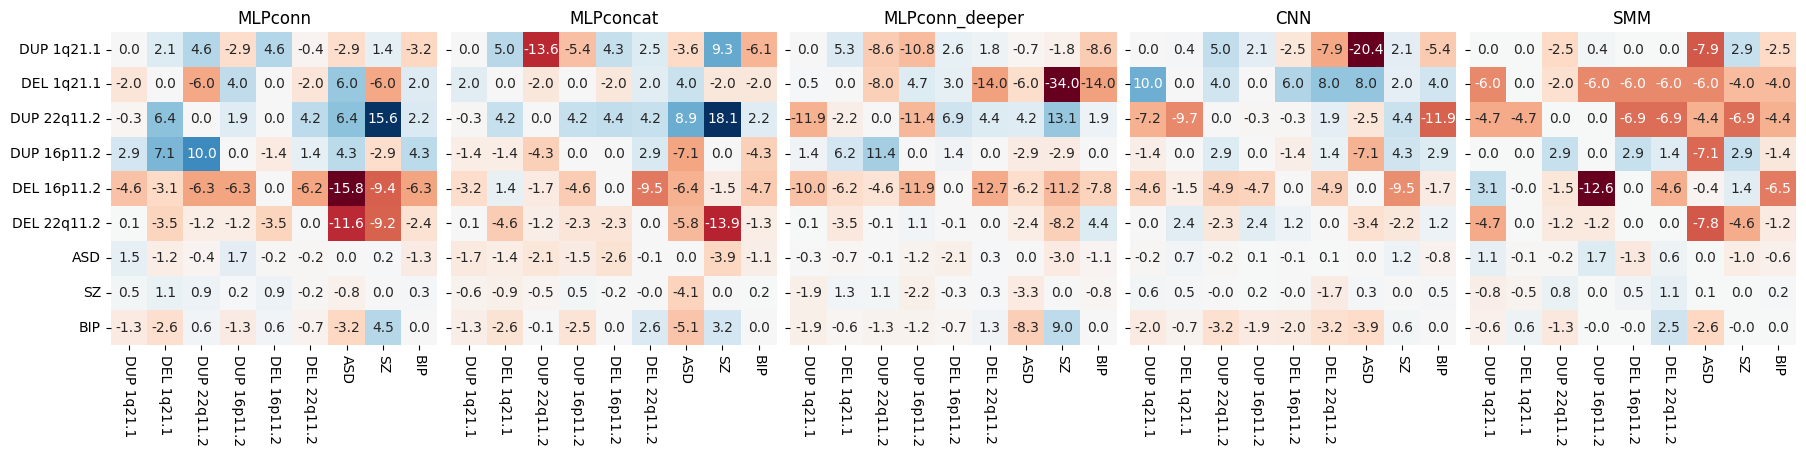

In [17]:
fig,ax = plt.subplots(1,5,figsize=(18,4.5),sharey=True,sharex=True)
sns.heatmap(mlp_diff,xticklabels=labels,yticklabels=labels,annot=True,cmap='RdBu',cbar=False,ax=ax[0],center=0,fmt='.1f')
sns.heatmap(concat_diff,xticklabels=labels,yticklabels=labels,annot=True,cmap='RdBu',cbar=False,ax=ax[1],center=0,fmt='.1f')
sns.heatmap(deeper_diff,xticklabels=labels,yticklabels=labels,annot=True,cmap='RdBu',cbar=False,ax=ax[2],center=0,fmt='.1f')
sns.heatmap(cnn_diff,xticklabels=labels,yticklabels=labels,annot=True,cmap='RdBu',cbar=False,ax=ax[3],center=0,fmt='.1f')
sns.heatmap(mps_big_diff,xticklabels=labels,yticklabels=labels,annot=True,cmap='RdBu',cbar=False,ax=ax[4],center=0,fmt='.1f')
ax[0].set_title('MLPconn')
ax[1].set_title('MLPconcat')
ax[2].set_title('MLPconn_deeper')
ax[3].set_title('CNN')
ax[4].set_title('SMM')

ax[0].set_xticklabels(labels,rotation=270)
ax[1].set_xticklabels(labels,rotation=270)
ax[2].set_xticklabels(labels,rotation=270)
ax[3].set_xticklabels(labels,rotation=270)
ax[4].set_xticklabels(labels,rotation=270)
plt.tight_layout(pad=0.5)
plt.savefig('./results_paper/neg_transfer/figures/quint_comparison.png',dpi=300)

# Overall gains

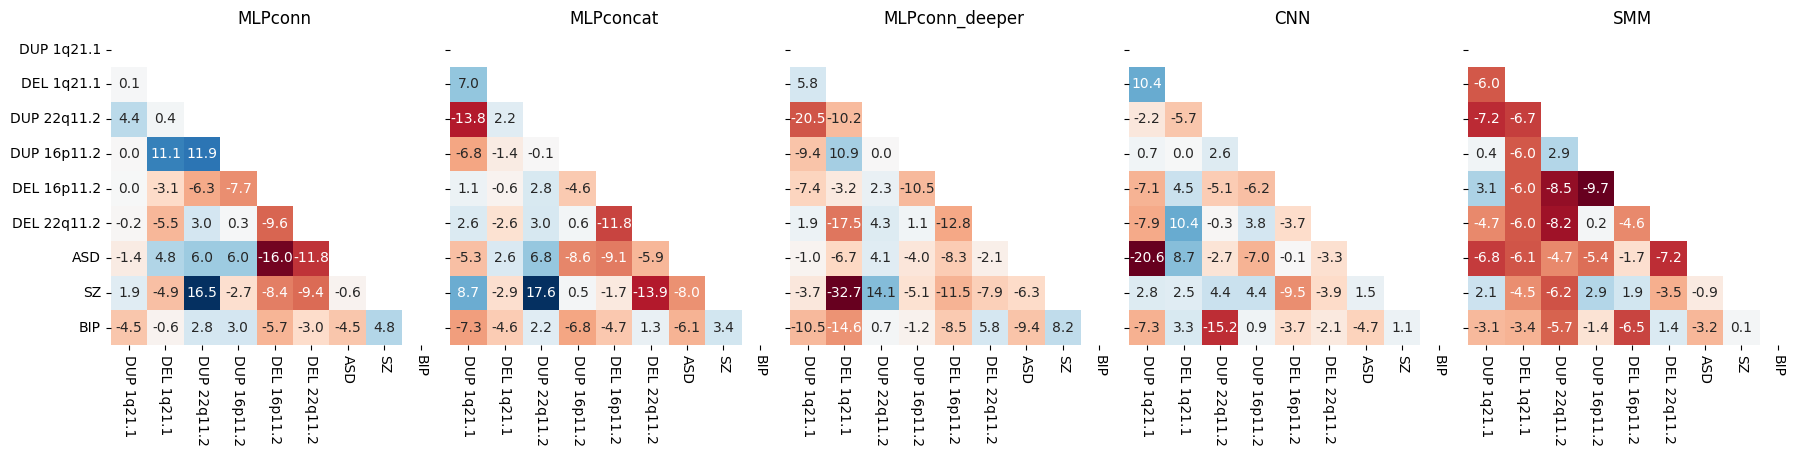

In [18]:
fig,ax = plt.subplots(1,5,figsize=(18,4.5),sharey=True,sharex=True)
sns.heatmap(mlp_diff + mlp_diff.transpose(),xticklabels=labels,yticklabels=labels,annot=True,cmap='RdBu',cbar=False,ax=ax[0],center=0,fmt='.1f',mask = np.triu(np.ones((9,9))))
sns.heatmap(concat_diff + concat_diff.transpose(),xticklabels=labels,yticklabels=labels,annot=True,cmap='RdBu',cbar=False,ax=ax[1],center=0,fmt='.1f',mask = np.triu(np.ones((9,9))))
sns.heatmap(deeper_diff + deeper_diff.transpose(),xticklabels=labels,yticklabels=labels,annot=True,cmap='RdBu',cbar=False,ax=ax[2],center=0,fmt='.1f',mask = np.triu(np.ones((9,9))))
sns.heatmap(cnn_diff + cnn_diff.transpose(),xticklabels=labels,yticklabels=labels,annot=True,cmap='RdBu',cbar=False,ax=ax[3],center=0,fmt='.1f',mask = np.triu(np.ones((9,9))))
sns.heatmap(mps_big_diff + mps_big_diff.transpose(),xticklabels=labels,yticklabels=labels,annot=True,cmap='RdBu',cbar=False,ax=ax[4],center=0,fmt='.1f',mask = np.triu(np.ones((9,9))))
ax[0].set_title('MLPconn')
ax[1].set_title('MLPconcat')
ax[2].set_title('MLPconn_deeper')
ax[3].set_title('CNN')
ax[4].set_title('SMM')

ax[0].set_xticklabels(labels,rotation=270)
ax[1].set_xticklabels(labels,rotation=270)
ax[2].set_xticklabels(labels,rotation=270)
ax[3].set_xticklabels(labels,rotation=270)
ax[4].set_xticklabels(labels,rotation=270)
plt.tight_layout(pad=0.5)
plt.savefig('./results_paper/neg_transfer/figures/quint_gains.png',dpi=300)

# Combined plot

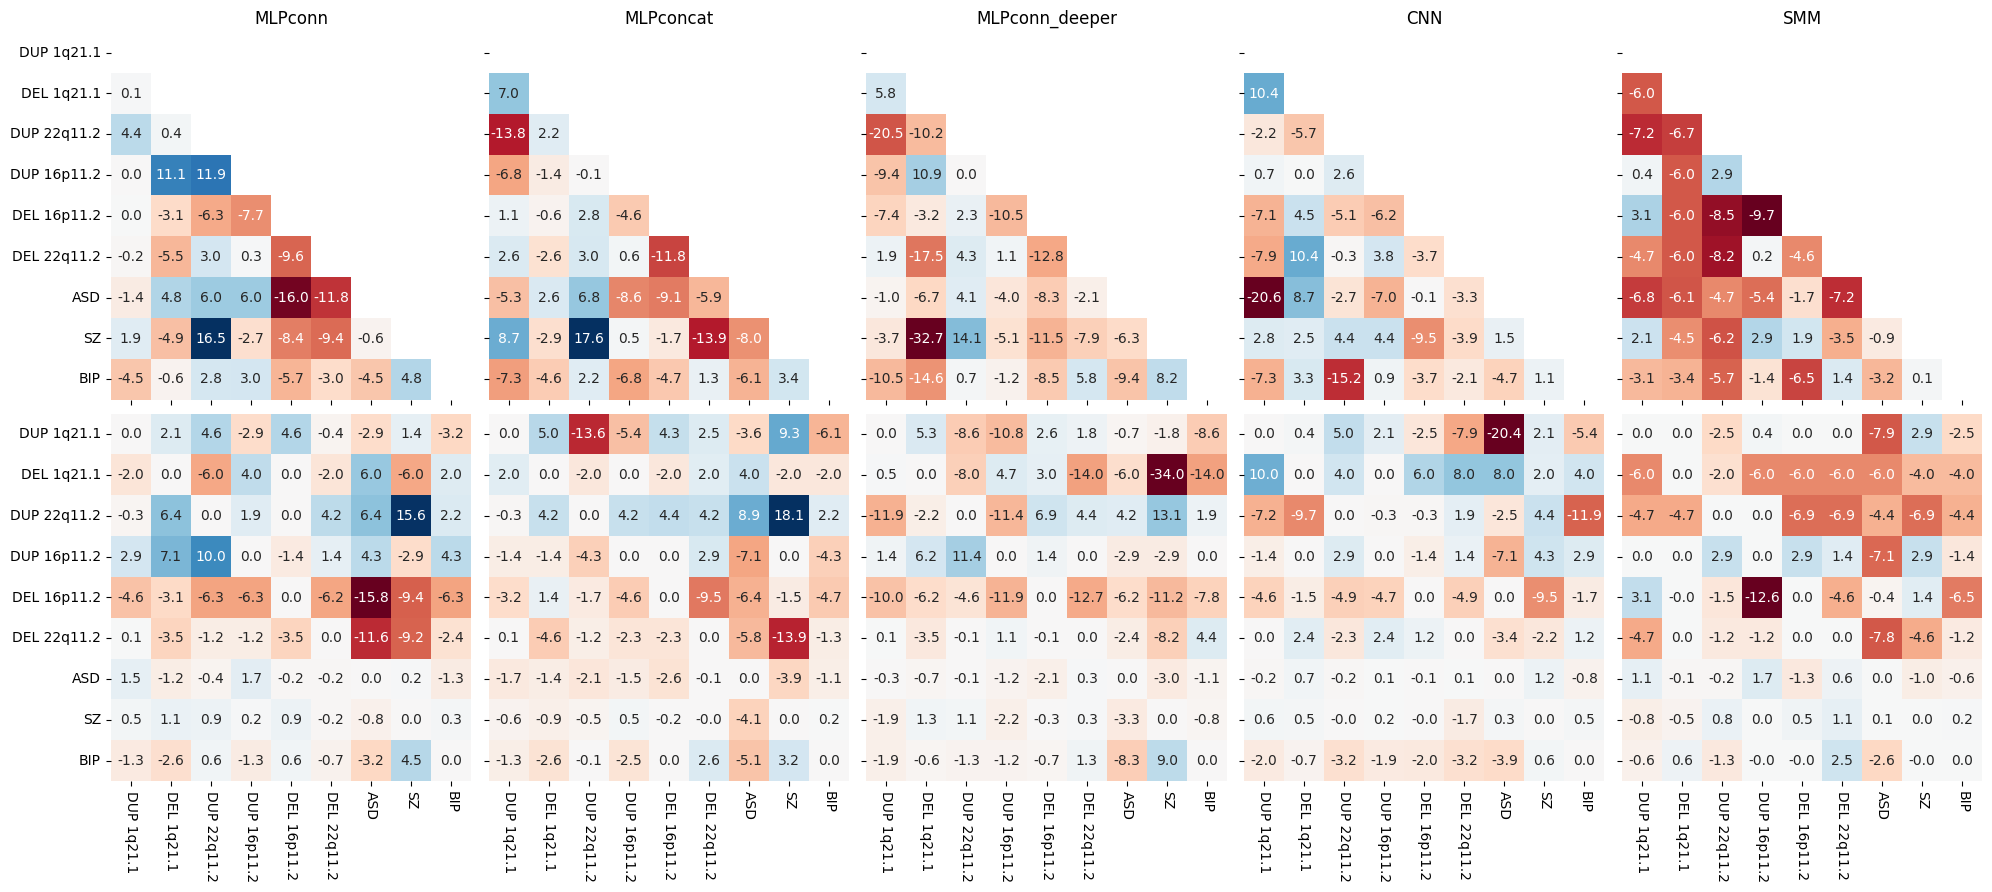

In [19]:
fig,ax = plt.subplots(2,5,figsize=(20,9),sharey=True,sharex=True)

# Pair Gains
sns.heatmap(mlp_diff + mlp_diff.transpose(),xticklabels=labels,yticklabels=labels,annot=True,cmap='RdBu',cbar=False,ax=ax[0,0],center=0,fmt='.1f',mask = np.triu(np.ones((9,9))))
sns.heatmap(concat_diff + concat_diff.transpose(),xticklabels=labels,yticklabels=labels,annot=True,cmap='RdBu',cbar=False,ax=ax[0,1],center=0,fmt='.1f',mask = np.triu(np.ones((9,9))))
sns.heatmap(deeper_diff + deeper_diff.transpose(),xticklabels=labels,yticklabels=labels,annot=True,cmap='RdBu',cbar=False,ax=ax[0,2],center=0,fmt='.1f',mask = np.triu(np.ones((9,9))))
sns.heatmap(cnn_diff + cnn_diff.transpose(),xticklabels=labels,yticklabels=labels,annot=True,cmap='RdBu',cbar=False,ax=ax[0,3],center=0,fmt='.1f',mask = np.triu(np.ones((9,9))))
sns.heatmap(mps_big_diff + mps_big_diff.transpose(),xticklabels=labels,yticklabels=labels,annot=True,cmap='RdBu',cbar=False,ax=ax[0,4],center=0,fmt='.1f',mask = np.triu(np.ones((9,9))))

# Full pairwise
sns.heatmap(mlp_diff,xticklabels=labels,yticklabels=labels,annot=True,cmap='RdBu',cbar=False,ax=ax[1,0],center=0,fmt='.1f')
sns.heatmap(concat_diff,xticklabels=labels,yticklabels=labels,annot=True,cmap='RdBu',cbar=False,ax=ax[1,1],center=0,fmt='.1f')
sns.heatmap(deeper_diff,xticklabels=labels,yticklabels=labels,annot=True,cmap='RdBu',cbar=False,ax=ax[1,2],center=0,fmt='.1f')
sns.heatmap(cnn_diff,xticklabels=labels,yticklabels=labels,annot=True,cmap='RdBu',cbar=False,ax=ax[1,3],center=0,fmt='.1f')
sns.heatmap(mps_big_diff,xticklabels=labels,yticklabels=labels,annot=True,cmap='RdBu',cbar=False,ax=ax[1,4],center=0,fmt='.1f')
ax[0,0].set_title('MLPconn')
ax[0,1].set_title('MLPconcat')
ax[0,2].set_title('MLPconn_deeper')
ax[0,3].set_title('CNN')
ax[0,4].set_title('SMM')

ax[1,0].set_xticklabels(labels,rotation=270)
ax[1,1].set_xticklabels(labels,rotation=270)
ax[1,2].set_xticklabels(labels,rotation=270)
ax[1,3].set_xticklabels(labels,rotation=270)
ax[1,4].set_xticklabels(labels,rotation=270)
plt.tight_layout(pad=1)
plt.savefig('./results_paper/neg_transfer/figures/quint_two_row_comparison.png',dpi=300)

# Correlate

In [20]:
# MLPconn & MLPconn_deeper
pearsonr(mlp_diff.reshape(-1),deeper_diff.reshape(-1))

PearsonRResult(statistic=0.5480891306888646, pvalue=1.1822584878747051e-07)

In [21]:
# MLPconn & MLPconcat
pearsonr(mlp_diff.reshape(-1),concat_diff.reshape(-1))

PearsonRResult(statistic=0.5454881952196015, pvalue=1.3938984175745322e-07)

In [22]:
# MLPconn & CNN
pearsonr(mlp_diff.reshape(-1),cnn_diff.reshape(-1))

PearsonRResult(statistic=0.19887178581705806, pvalue=0.07510035870206218)

In [23]:
# MLPconn & MPS
pearsonr(mlp_diff.reshape(-1),mps_diff.reshape(-1))

PearsonRResult(statistic=0.3837842783535038, pvalue=0.00040495231506753406)

In [24]:
# MLPconn & MPS
pearsonr(mlp_diff.reshape(-1),mps_big_diff.reshape(-1))

PearsonRResult(statistic=0.028909256739427305, pvalue=0.7978019194754679)

# Cluster

In [41]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [57]:
mlp_dist = mlp_diff.max() - mlp_diff
deeper_dist = deeper_diff.max() - deeper_diff
concat_dist = concat_diff.max() - concat_diff
cnn_dist = cnn_diff.max() - cnn_diff
mps_big_dist = mps_big_diff.max() - mps_big_diff

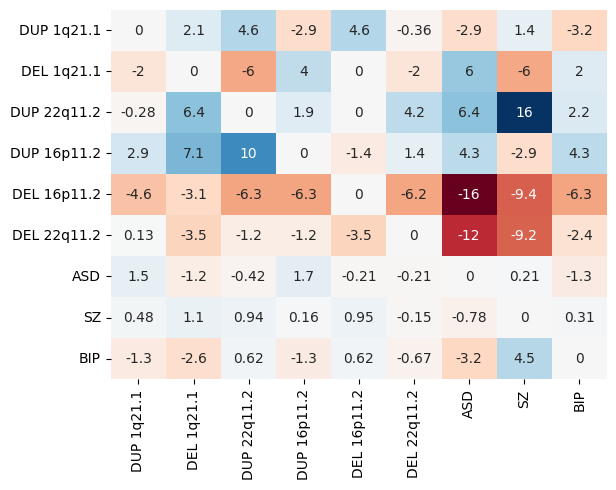

<AxesSubplot: >

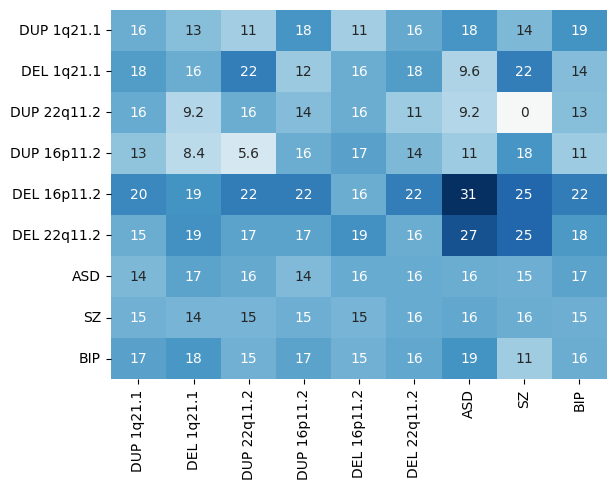

In [58]:
sns.heatmap(mlp_diff,annot=True,cmap='RdBu',cbar=False,center=0,xticklabels=labels,yticklabels=labels)
plt.show()
sns.heatmap(mlp_dist,annot=True,cmap='RdBu',cbar=False,center=0,xticklabels=labels,yticklabels=labels)

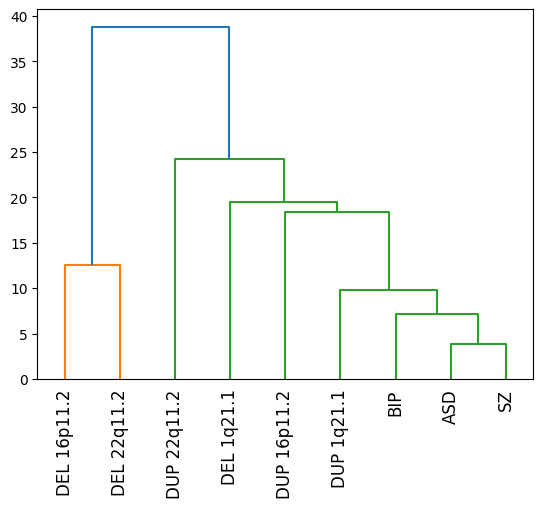

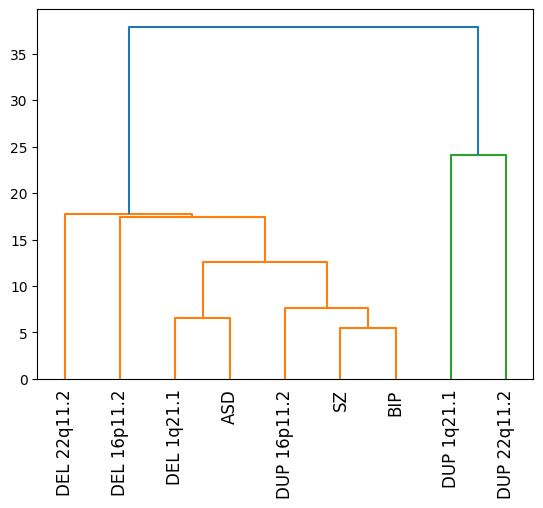

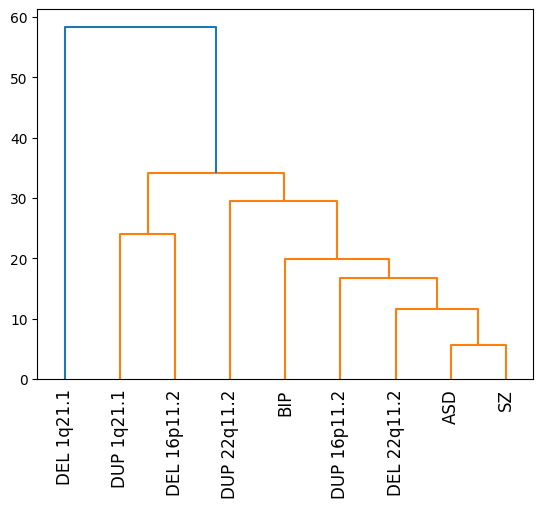

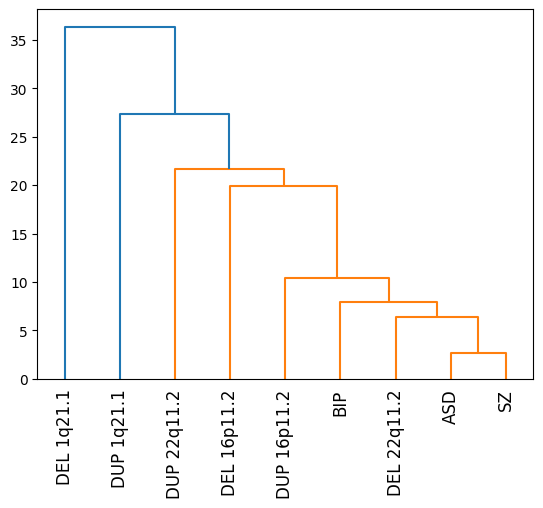

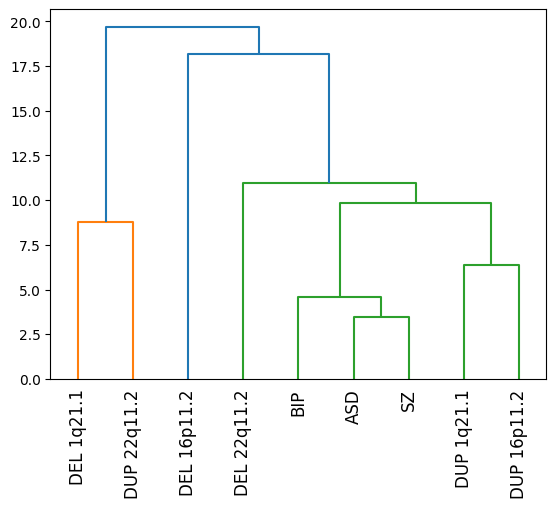

In [63]:
Z_mlp = linkage(mlp_dist, 'complete')
Z_concat = linkage(concat_dist, 'complete')
Z_deeper = linkage(deeper_dist, 'complete')
Z_cnn = linkage(cnn_dist, 'complete')
Z_mps_big = linkage(mps_big_dist, 'complete')

dendrogram(Z_mlp, labels=labels, orientation='top', leaf_rotation=90)
plt.show()
dendrogram(Z_concat, labels=labels, orientation='top', leaf_rotation=90)
plt.show()
dendrogram(Z_deeper, labels=labels, orientation='top', leaf_rotation=90)
plt.show()
dendrogram(Z_cnn, labels=labels, orientation='top', leaf_rotation=90)
plt.show()
dendrogram(Z_mps_big, labels=labels, orientation='top', leaf_rotation=90)
plt.show()

In [64]:
# Clusterize the data
threshold = 0.8
clabels_mlp = fcluster(Z_mlp, threshold, criterion='distance')
clabels_concat = fcluster(Z_concat, threshold, criterion='distance')
clabels_deeper = fcluster(Z_deeper, threshold, criterion='distance')
clabels_cnn = fcluster(Z_cnn, threshold, criterion='distance')
clabels_mps_big = fcluster(Z_mps_big, threshold, criterion='distance')

In [68]:
# Build a new dataframe with the sorted columns

# MLP
for idx,i in enumerate(np.argsort(clabels_mlp)):
    if idx == 0:
        clustered_mlp = pd.DataFrame(mlp_diff[i],columns=[labels[i]],index=labels)
    else:
        df_to_append = pd.DataFrame(mlp_diff[i],columns=[labels[i]],index=labels)
        clustered_mlp = pd.concat([clustered_mlp, df_to_append], axis=1)

# concat
for idx,i in enumerate(np.argsort(clabels_concat)):
    if idx == 0:
        clustered_concat = pd.DataFrame(concat_diff[i],columns=[labels[i]],index=labels)
    else:
        df_to_append = pd.DataFrame(concat_diff[i],columns=[labels[i]],index=labels)
        clustered_concat = pd.concat([clustered_concat, df_to_append], axis=1)

# deeper
for idx,i in enumerate(np.argsort(clabels_deeper)):
    if idx == 0:
        clustered_deeper = pd.DataFrame(deeper_diff[i],columns=[labels[i]],index=labels)
    else:
        df_to_append = pd.DataFrame(deeper_diff[i],columns=[labels[i]],index=labels)
        clustered_deeper = pd.concat([clustered_deeper, df_to_append], axis=1)

# CNN
for idx,i in enumerate(np.argsort(clabels_cnn)):
    if idx == 0:
        clustered_cnn = pd.DataFrame(cnn_diff[i],columns=[labels[i]],index=labels)
    else:
        df_to_append = pd.DataFrame(cnn_diff[i],columns=[labels[i]],index=labels)
        clustered_cnn = pd.concat([clustered_cnn, df_to_append], axis=1)

# mps_big
for idx,i in enumerate(np.argsort(clabels_mps_big)):
    if idx == 0:
        clustered_mps_big = pd.DataFrame(mps_big_diff[i],columns=[labels[i]],index=labels)
    else:
        df_to_append = pd.DataFrame(mps_big_diff[i],columns=[labels[i]],index=labels)
        clustered_mps_big = pd.concat([clustered_mps_big, df_to_append], axis=1)

In [66]:
clustered_mlp.loc[[labels[i] for i in np.argsort(clabels_mlp)]]

,DEL 16p11.2,DEL 22q11.2,ASD,SZ,BIP,DUP 1q21.1,DUP 16p11.2,DEL 1q21.1,DUP 22q11.2
DEL 16p11.2,0.000000,-3.464052,-0.209952,0.949803,0.625000,4.642857,-1.428571,0.0,0.000000
DEL 22q11.2,-6.153846,0.000000,-0.212203,-0.153789,-0.665323,-0.357143,1.428571,-2.0,4.166667
ASD,-15.769231,-11.633987,0.000000,-0.780020,-3.185484,-2.857143,4.285714,6.0,6.388889
SZ,-9.358974,-9.215686,0.208263,0.000000,4.475806,1.428571,-2.857143,-6.0,15.555556
BIP,-6.282051,-2.352941,-1.277159,0.314961,0.000000,-3.214286,4.285714,2.0,2.222222
DUP 1q21.1,-4.615385,0.130719,1.480356,0.483514,-1.330645,0.000000,2.857143,-2.0,-0.277778
DUP 16p11.2,-6.282051,-1.176471,1.697625,0.163632,-1.310484,-2.857143,0.000000,4.0,1.944444
DEL 1q21.1,-3.076923,-3.464052,-1.168524,1.103593,-2.560484,2.142857,7.142857,0.0,6.388889
DUP 22q11.2,-6.282051,-1.176471,-0.419340,0.943652,0.625000,4.642857,10.000000,-6.0,0.000000


<AxesSubplot: >

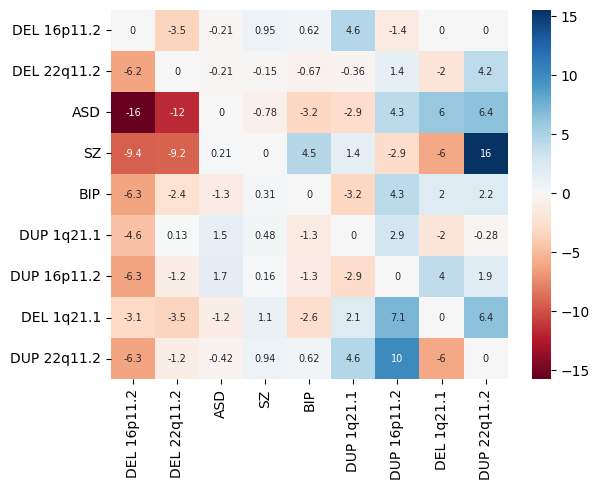

In [67]:
sns.heatmap(round(clustered_mlp.loc[[labels[i] for i in np.argsort(clabels_mlp)]],2), cmap='RdBu', annot=True, annot_kws={"size": 7}, center=0)

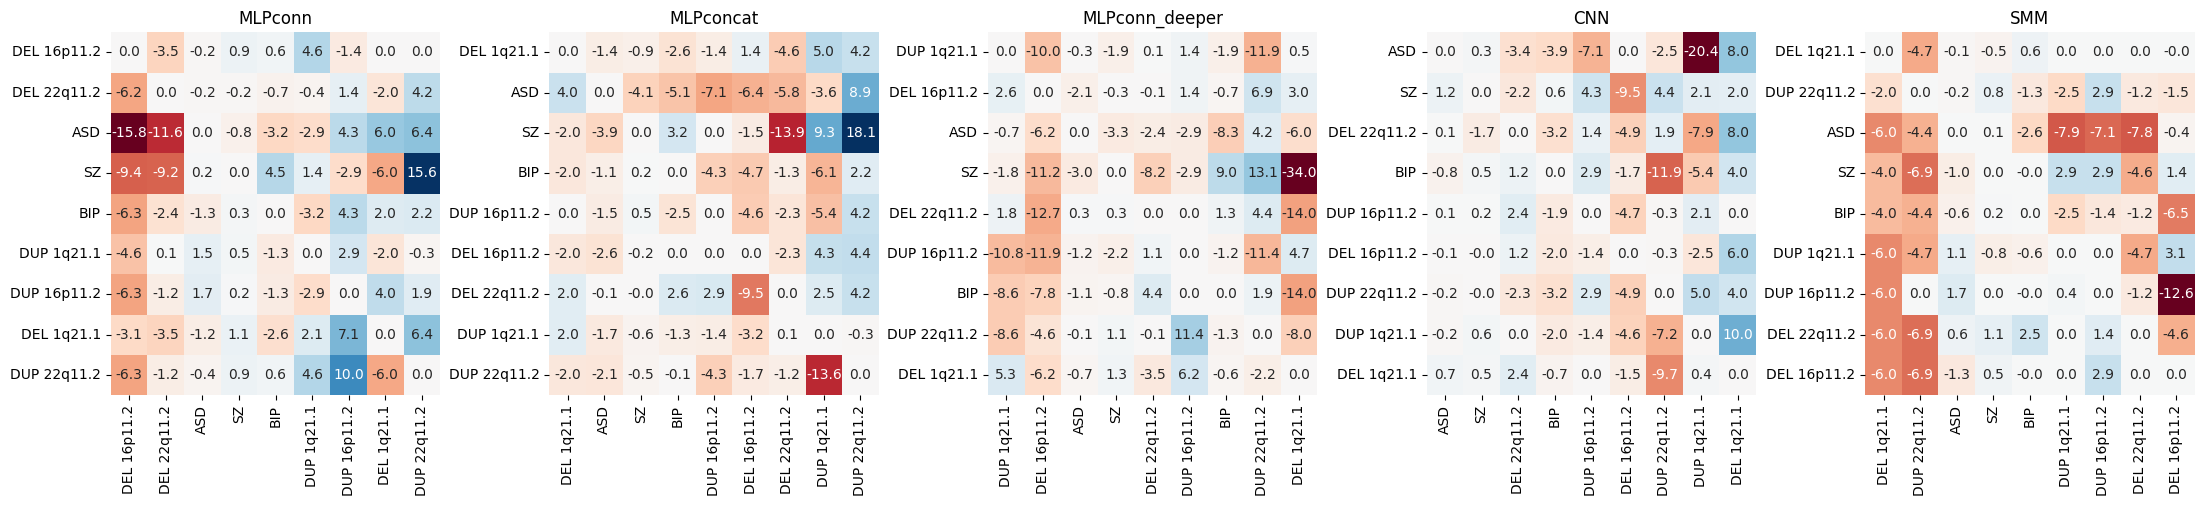

In [79]:
fig,ax = plt.subplots(1,5,figsize=(22,5))
sns.heatmap(clustered_mlp.loc[[labels[i] for i in np.argsort(clabels_mlp)]],annot=True,cmap='RdBu',cbar=False,ax=ax[0],center=0,fmt='.1f')
sns.heatmap(clustered_concat.loc[[labels[i] for i in np.argsort(clabels_concat)]],annot=True,cmap='RdBu',cbar=False,ax=ax[1],center=0,fmt='.1f')
sns.heatmap(clustered_deeper.loc[[labels[i] for i in np.argsort(clabels_deeper)]],annot=True,cmap='RdBu',cbar=False,ax=ax[2],center=0,fmt='.1f')
sns.heatmap(clustered_cnn.loc[[labels[i] for i in np.argsort(clabels_cnn)]],annot=True,cmap='RdBu',cbar=False,ax=ax[3],center=0,fmt='.1f')
sns.heatmap(clustered_mps_big.loc[[labels[i] for i in np.argsort(clabels_mps_big)]],annot=True,cmap='RdBu',cbar=False,ax=ax[4],center=0,fmt='.1f')
ax[0].set_title('MLPconn')
ax[1].set_title('MLPconcat')
ax[2].set_title('MLPconn_deeper')
ax[3].set_title('CNN')
ax[4].set_title('SMM')

#ax[0].set_xticklabels(labels,rotation=270)
#ax[1].set_xticklabels(labels,rotation=270)
#ax[2].set_xticklabels(labels,rotation=270)
#ax[3].set_xticklabels(labels,rotation=270)
#ax[4].set_xticklabels(labels,rotation=270)
plt.tight_layout(pad=0.5)
#plt.savefig('./results_paper/neg_transfer/figures/quint_gains.png',dpi=300)